# Food loss and waste database

The database was downloaded from the website of the Food and Agriculture Organization of the United Nations [website](https://www.fao.org/platform-food-loss-waste/flw-data/en/).

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

In [2]:
# Locating the file
HOME = Path() / '../'
FAO = HOME / 'food-waste-dataset' / 'fao'
DATA = FAO / 'food-loss-waste' / 'data-edited-2.csv'
df = pd.read_csv(DATA)

In [3]:
# Reading the columns
print(f'There are {len(df.columns)} columns in the database:')
for c in df.columns:
    print('->', c)

There are 18 columns in the database:
-> m49_code
-> country
-> region
-> cpc_code
-> commodity
-> year
-> loss_percentage
-> loss_percentage_original
-> loss_quantity
-> activity
-> food_supply_stage
-> treatment
-> cause_of_loss
-> sample_size
-> method_data_collection
-> reference
-> url
-> notes


In [4]:
# Reading the areas (regions)
regions = df['region'].unique()
print(f'There are {len(regions)} different regions in the dataset:')
for c in regions:
    print('->', c)

There are 58 different regions in the dataset:
-> nan
-> Xiasha Town
-> Fujian Province
-> Cixi county
-> Daxing, Tongxian, and Yanqing counties, which are satellite towns of Beijing, and in Jixian County of Hebei Province, which is a suburb very close to Beijing
-> Daxing, Tongxian, and Yanqing
-> Shandong Province
-> Jiangan district
-> Xiasha town
-> Parakou (Borgou)
-> El Carchi, Imbabura, and Pichincha
-> El Carchi
-> Ejisu Juabeng
-> Brong - Ahafo region (highly productive zone)
-> Site: Kumasi & Tamale.
-> ? Sites: coastal and transition ecological zones of Ghana
-> Nerica 1 & Nerica 2
-> coastal and transition ecological zones of Ghana 
-> coastal and transition ecological zones of Ghana
-> Savanna and transition ecological zones of Ghana
-> forest and coastal ecological zones of Ghana
-> Sites: transition ecological zone of Ghana
-> Sites: transitionecological zone ofGhana
-> Savanna, transition and coastal ecological zones of Ghana
-> Volta region, Northern region, Brong-Ahaf

In [5]:
print('Among them there is some missing / dirty data:')
print('nan')
print('-> Region - X')
print('-> Region X')
print('Anyway, what really matters is the "country" column')

Among them there is some missing / dirty data:
nan
-> Region - X
-> Region X
Anyway, what really matters is the "country" column


In [6]:
# Reading the countries
countries = sorted(df['country'].unique())
print(f'There are {len(countries)} different countries in the dataset:')
for c in countries:
    print('->', c)

There are 60 different countries in the dataset:
-> Africa
-> Algeria
-> Australia
-> Azerbaijan
-> Bahrain
-> Bangladesh
-> Benin
-> Brazil
-> Cameroon
-> Canada
-> China
-> Costa Rica
-> Côte d'Ivoire
-> Denmark
-> Ecuador
-> Egypt
-> Finland
-> Gabon
-> Gambia
-> Germany
-> Ghana
-> Guatemala
-> Guinea
-> Guinea-Bissau
-> Honduras
-> India
-> Indonesia
-> Iran (Islamic Republic of)
-> Kazakhstan
-> Kenya
-> Madagascar
-> Malawi
-> Malaysia
-> Mali
-> Mexico
-> Nepal
-> Nigeria
-> Norway
-> Oman
-> Pakistan
-> Panama
-> Paraguay
-> Peru
-> Philippines
-> Rwanda
-> Sierra Leone
-> Sub-Saharan Africa
-> Sweden
-> Thailand
-> Trinidad and Tobago
-> Turkey
-> Uganda
-> Ukraine
-> United Kingdom of Great Britain and Northern Ireland
-> United Republic of Tanzania
-> United States of America
-> Viet Nam
-> Western Africa
-> Zambia
-> Zimbabwe


In [7]:
print('Some countries are repeated (eg: "United Kingdom of Great Britain and Northern Ireland" vs "United Kingdom")')
# Renaming United Kingdom of Great Britain and Northern Ireland to United Kingdom
df.loc[df['country'] == 'United Kingdom of Great Britain and Northern Ireland', 'country'] = 'United Kingdom'
print('Now there are "only"', len(df['country'].unique()), 'countries')

Some countries are repeated (eg: "United Kingdom of Great Britain and Northern Ireland" vs "United Kingdom")
Now there are "only" 60 countries


In [8]:
# Reading the commodities
commodities = sorted(df['commodity'].unique())
print(f'There are {len(commodities)} different commodities:')
for c in commodities:
    print('->', c)

There are 58 different commodities:
-> Apples
-> Avocados
-> Bananas
-> Beans, dry
-> Cabbages
-> Cantaloupes and other melons
-> Carrots and turnips
-> Cassava, fresh
-> Cauliflowers and broccoli
-> Cherries
-> Cocoa beans
-> Cow peas, dry
-> Cucumbers and gherkins
-> Dairy products n.e.c.
-> Dates
-> Eggplants (aubergines)
-> Figs
-> Grapes
-> Groundnuts, excluding shelled
-> Kiwi fruit
-> Lettuce and chicory
-> Maize (corn)
-> Mangoes, guavas and mangosteens
-> Meat of cattle with the bone, fresh or chilled
-> Meat of chickens, fresh or chilled
-> Millet
-> Mixed grain
-> Okra
-> Onions and shallots, green
-> Oranges
-> Other citrus fruit, n.e.c.
-> Other fruits, n.e.c.
-> Other stimulant, spice and aromatic crops, n.e.c.
-> Other stone fruits
-> Other tropical and subtropical fruits, n.e.c.
-> Papayas
-> Pears
-> Peas, dry
-> Peas, green
-> Pepper (<i>Piper</i> spp.), raw
-> Persimmons
-> Pineapples
-> Pistachios, in shell
-> Plantains and cooking bananas
-> Potatoes
-> Raspberries

In [9]:
# The column 'loss_quantity' contains strings instead of numbers
# and some of them are dirty: they end with 'kg/MT'

# df['loss_quantity'] = df['loss_quantity'].str.replace('kg/MT', '')
# df['loss_quantity'] = df['loss_quantity'].str.replace('kg', '')
# df['loss_quantity'] = df['loss_quantity'].astype(float)

In [10]:
# Plotting the quantity of lost apples in France in the last years...
france_df = df.loc[(df['country'] == 'France')]
# First of all, which types of food did France lose?
print('France lost the following types of food:')
for f in france_df['commodity'].unique():
    print('->', f)

France lost the following types of food:


In [11]:
print('France didn\'t lose any apples, but they did loose some "Rice"')
france_rice_df = france_df.loc[(france_df['commodity'] == 'Rice')]
france_rice_df = france_rice_df[['year', 'loss_quantity']]

france_rice_df.plot(x='year', y='loss_quantity')
plt.legend(['Loss of rice in France'])
plt.show()

France didn't lose any apples, but they did loose some "Rice"


TypeError: no numeric data to plot

What type of food was lost the most in France in the last available year?
         commodity  loss_quantity
5437         Wheat       387000.0
5438  Maize (corn)       121000.0
5439          Rice         1000.0
5440       Sorghum         2000.0
5441        Barley       109000.0


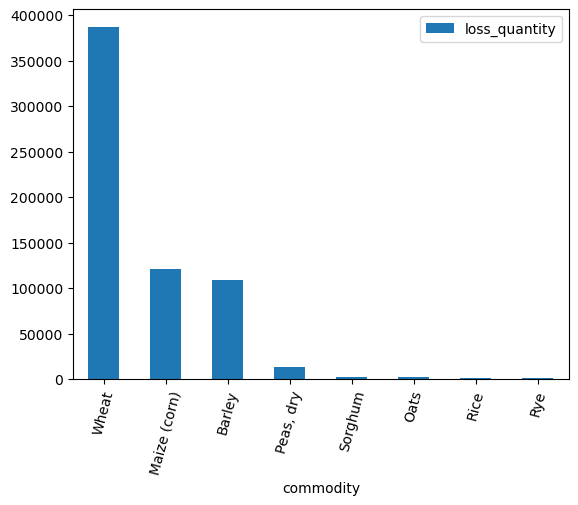

In [ ]:
print('What type of food was lost the most in France in the last available year?')
# It looks like they didn't lose anything after 2015
france_loss_df = france_df.loc[(france_df['year'] == 2015)]
france_loss_df = france_loss_df[['commodity', 'loss_quantity']]
print(france_loss_df.head())
france_loss_df = france_loss_df.sort_values(by='loss_quantity', ascending=False)
france_loss_df.plot.bar(x='commodity', y='loss_quantity')
plt.xticks(rotation=75)
plt.show()